# Assignment 3: Orthogonalization and Regression

## Hand calculations

### 1

### 1.a Caclulate (use Python) $cond_2(A)$ and $cond_2(A^TA)$

In [135]:
# same the exam   form the data imidiatly Form ..... 
import numpy as np
import pandas as pd
Matrix_A =  np.array([[1,8.1],[1,10.0],[1,11.2],[1,12.7],[1,13.0]])
#print(Matrix_A)
A_cond_number = np.linalg.cond(Matrix_A)
print(A_cond_number)
A_T = Matrix_A.T
ATA_cond_number = np.linalg.cond(A_T @ Matrix_A)
print(ATA_cond_number)

69.28012237225525
4799.735355915109


- $Cond_2(A) = 69.28012237225525$
- $Cond_2(A^TA) = 4799.735355915109$

### 1.b Repeat a) but use the model $y = \beta_0 + \beta_1 \frac{x-\bar{x}}{\sigma(x)}$

In [3]:
import numpy as np
import pandas as pd
x = np.array([8.1, 10.0, 11.2, 12.7, 13.0])
x_mean = np.mean(x)
#print(x_mean)
x_std = np.std(x)
#print(x_std)
x_stand_b = (x - x_mean) / x_std
#print(x_stand_b)
A_stand_b = np.vstack([np.ones_like(x_stand_b), x_stand_b]).T
#print(A_stand_b)
bA_cond_number = np.linalg.cond(A_stand_b)
#print(bA_cond_number)
bATbA_cond_number = np.linalg.cond(A_stand_b.T @ A_stand_b)
#print(bATbA_cond_number)

[-1.60419432 -0.55317045  0.11063409  0.94038977  1.10634091]


- $Cond_2(A) = 1$
- $Cond_2(A^TA) = 1$

In [5]:
import numpy as np
import pandas as pd
x = np.array([8.1, 10.0, 11.2, 12.7, 13.0])
x_mean = np.mean(x)
#print(x_mean)
x_std = np.std(x)
#print(x_std)
x_stand_b = (x - x_mean) / x_std
#print(x_stand_b)
A_stand_b = np.vstack([np.ones_like(x_stand_b), x_stand_b]).T
Matrix_A =  np.array([[1,8.1],[1,10.0],[1,11.2],[1,12.7],[1,13.0]])
Matrix_b = np.array([5.0 ,5.0,4.0,3.0,1.0])


### 2

In [162]:
import numpy as np
np.random.seed(42)
Random_matrix = np.random.rand(5, 5)
#print(Random_matrix)
Q, R = np.linalg.qr(Random_matrix)
Q_cond_number = np.linalg.cond(Q,2)
print(Q_cond_number)

1.0000000000000004


- $Cond_2(Q) = 1$

## Sofrware calculations

### 3

In [2]:

# we can not remove 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path  =  'LifeExpectancyData.csv'
data = pd.read_csv(csv_file_path)
data_clean = data.dropna()
#data_clean = data

### 3.a

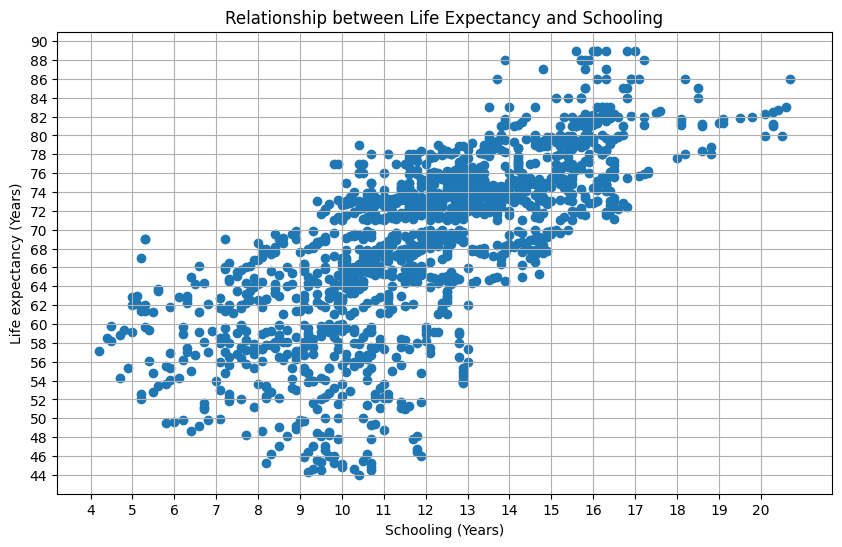

In [3]:

data_a = data_clean[['Life expectancy ', 'Schooling']]

plt.figure(figsize=(10, 6))
plt.scatter(data_a['Schooling'], data_a['Life expectancy '])


plt.xlabel('Schooling (Years)')
plt.ylabel('Life expectancy (Years)')
plt.title('Relationship between Life Expectancy and Schooling')


x_ticks = range(int(data_a['Schooling'].min()), int(data_a['Schooling'].max()) + 1, 1)
y_ticks = range(int(data_a['Life expectancy '].min()), int(data_a['Life expectancy '].max()) + 2, 2)

plt.xticks(x_ticks)
plt.yticks(y_ticks)


plt.xlim([data_a['Schooling'].min() - 1, data_a['Schooling'].max() + 1])
plt.ylim([data_a['Life expectancy '].min() - 2, data_a['Life expectancy '].max() + 2])

plt.grid(True)
plt.show()

### 3.b

In [6]:
data_b_x = data_a['Schooling']
data_b_y = data_a['Life expectancy ']
#data_b_x
#data_b_y
x_b = data_b_x.to_numpy()
y_b = data_b_y.to_numpy()
#x_b
#y_b
A = np.vstack([np.ones_like(x_b), x_b, x_b**2]).T
#A
Y = y_b
#A
#B

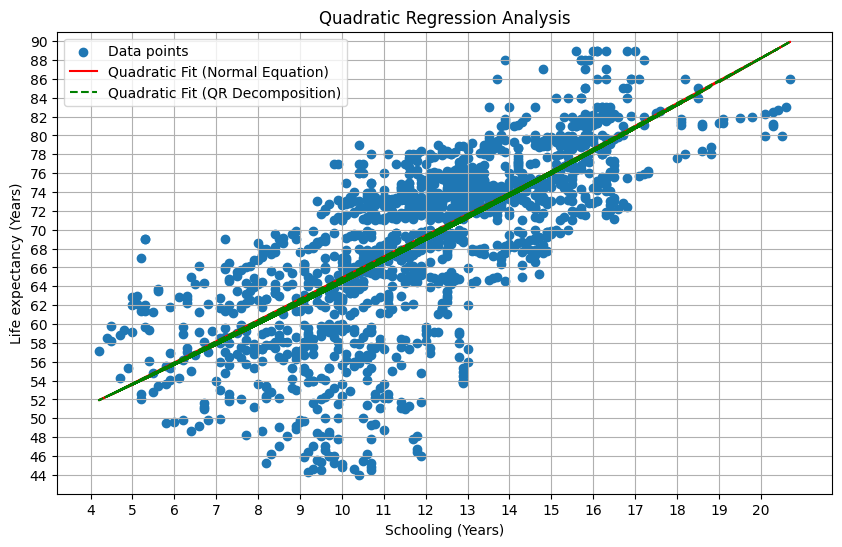

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import qr


# Method 1: Normal Equations 
ATA = A.T @ A
ATY = A.T @ Y
Coeffs_Normal_Equation = np.linalg.solve(ATA, ATY)

# Method 2: QR-Decomposition
Q, R = qr(A)
QTY = Q.T @ Y
Coeffs_QR = np.linalg.solve(R, QTY)

# Evaluate the polynomial
y_pred_Normal = np.polyval(Coeffs_Normal_Equation[::-1], x_b)
y_pred_QR = np.polyval(Coeffs_QR[::-1], x_b)

# Scatter plot with controlled tick intervals
plt.figure(figsize=(10, 6))
plt.scatter(x_b, Y, label='Data points')

# Plot the quadratic fits
plt.plot(x_b, y_pred_Normal, label='Quadratic Fit (Normal Equation)', color='red')
plt.plot(x_b, y_pred_QR, label='Quadratic Fit (QR Decomposition)', color='green', linestyle='--')

# Set labels and title
plt.xlabel('Schooling (Years)')
plt.ylabel('Life expectancy (Years)')
plt.title('Quadratic Regression Analysis')

# Define ticks for the x and y axes
x_ticks = np.arange(int(x_b.min()), int(x_b.max()) + 1, 1)
y_ticks = np.arange(int(Y.min()), int(Y.max()) + 2, 2)

plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Optional: Set limits for x and y axes for better visualization
plt.xlim([x_b.min() - 1, x_b.max() + 1])
plt.ylim([Y.min() - 2, Y.max() + 2])

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### 3.c

In [8]:
data_b_x = data_a['Schooling']
data_b_y = data_a['Life expectancy ']
#data_b_x
#data_b_y
x_b = data_b_x.to_numpy()
y_b = data_b_y.to_numpy()
#x_b
#y_b
A = np.vstack([np.ones_like(x_b), x_b, x_b**2]).T
#A
Y = y_b

In [9]:
cond_A = np.linalg.cond(A)
x_exact, residuals, rank, s = np.linalg.lstsq(A, Y, rcond=None)
#Normal Equations
x_ne = np.linalg.inv(A.T @ A) @ A.T @ Y

#QR-Decomposition
Q, R = np.linalg.qr(A)
x_qr = np.linalg.solve(R, Q.T @ Y)
relative_error_ne = np.linalg.norm(x_exact - x_ne) / np.linalg.norm(x_exact)
relative_error_qr = np.linalg.norm(x_exact - x_qr) / np.linalg.norm(x_exact)
#print(relative_error_ne)
#print(relative_error_qr)
print(cond_A)

2216.152618371592


- $\frac{|| \hat{x}_{exact}- \hat{x}_{NE}||}{||\hat{x}_{exact}||} = 1.4283097275361544 \times 10^{-13}$
- $\frac{|| \hat{x}_{exact}- \hat{x}_{QR}||}{||\hat{x}_{exact}||} = 3.521603460086744 \times 10^{-15}$

### 3.d

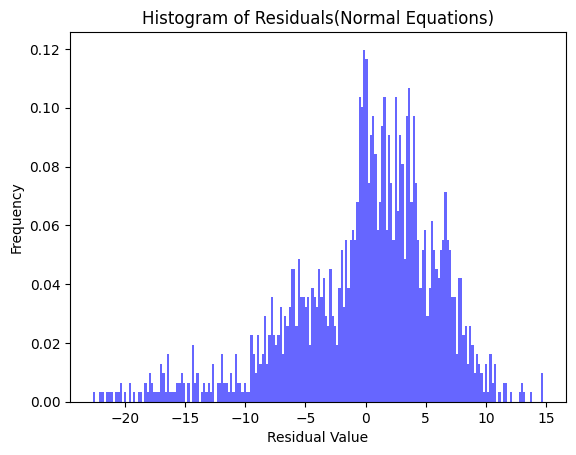

In [10]:
residualsNE = Y - A @ x_ne

plt.hist(residualsNE, bins=200, density=True, alpha=0.6, color='b')

plt.title('Histogram of Residuals(Normal Equations)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.show()

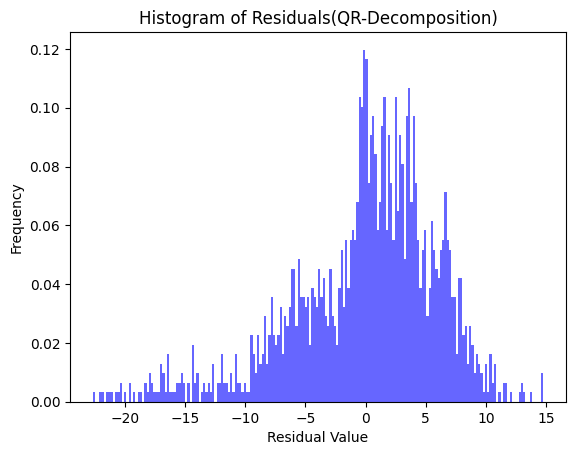

In [11]:
residualsQR = Y - A @ x_qr

plt.hist(residualsQR, bins=200, density=True, alpha=0.6, color='b')

plt.title('Histogram of Residuals(QR-Decomposition)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.show()

### 4

### Assignment 3 Feedback 
- Left nullspace, $N(A^T)$ is so big in relation to $C(A)$ => very likely that rhs have components in $N(A^T)$ => no exact solution.

In [12]:
import numpy as np
import pandas as pd

rank_A = np.linalg.matrix_rank(A)
#rank_A
C_A = rank_A
#C_A
N_A_T = A.shape[1] - rank_A
#N_A_T

- No eaxct solution.

### 5(Optimal)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path  =  'LifeExpectancyData.csv'
data5 = pd.read_csv(csv_file_path)
data_clean5 = data5.dropna()
data_clean5[:5]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


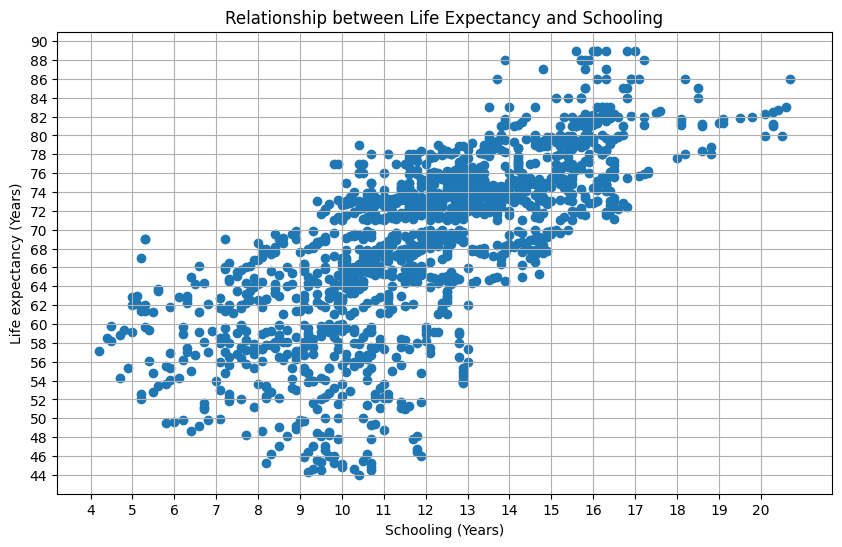

In [14]:
# data_a5 = data_clean5[['Life expectancy ','Schooling']]
# data_a5
# plt.scatter(data_a5['Schooling'], data_a5['Life expectancy '])
# plt.xlabel('Schooling (Years)')
# plt.ylabel('Life expectancy (Years)')
# plt.title('Relationship between Life Expectancy and Schooling')
# plt.show()
import matplotlib.pyplot as plt


data_a5 = data_clean5[['Life expectancy ', 'Schooling']]

# Scatter plot with controlled tick intervals
plt.figure(figsize=(10, 6))
plt.scatter(data_a5['Schooling'], data_a5['Life expectancy '])

# Setting labels
plt.xlabel('Schooling (Years)')
plt.ylabel('Life expectancy (Years)')
plt.title('Relationship between Life Expectancy and Schooling')

# Define ticks for the x and y axes
x_ticks = range(int(data_a5['Schooling'].min()), int(data_a5['Schooling'].max()) + 1, 1)
y_ticks = range(int(data_a5['Life expectancy '].min()), int(data_a5['Life expectancy '].max()) + 2, 2)

plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Optional: Set limits for x and y axes for better visualization
plt.xlim([data_a5['Schooling'].min() - 1, data_a5['Schooling'].max() + 1])
plt.ylim([data_a5['Life expectancy '].min() - 2, data_a5['Life expectancy '].max() + 2])

# Add grid for better readability
plt.grid(True)

# Show plot
plt.show()


In [15]:
data_b_x5 = data_a5['Schooling']
data_b_y5 = data_a5['Life expectancy ']
#data_b_x
#data_b_y
x_b5 = data_b_x5.to_numpy()
y_b5 = data_b_y5.to_numpy()
#x_b
#y_b
A5 = np.vstack([np.ones_like(x_b5), x_b5]).T
#A
Y5 = y_b5
#B

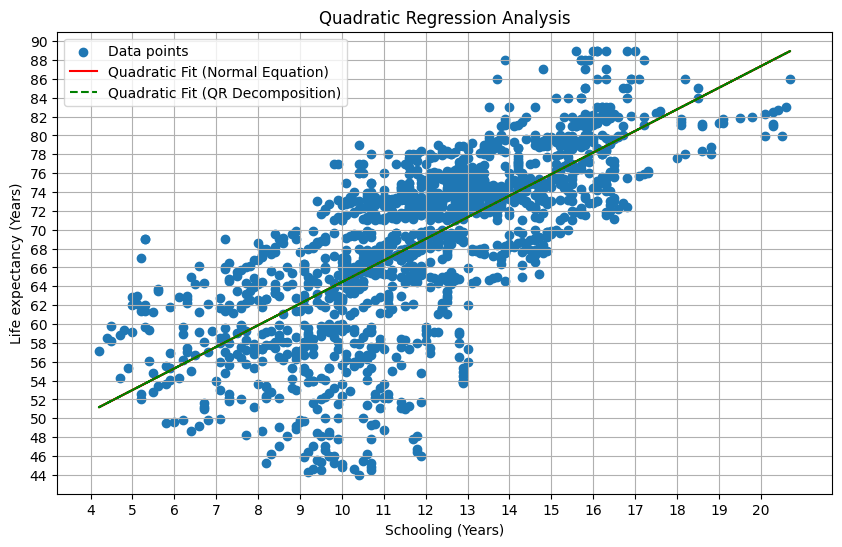

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import qr


# Method 1: Normal Equations 
ATA5 = A5.T @ A5
ATY5 = A5.T @ Y5
Coeffs_Normal_Equation5 = np.linalg.solve(ATA5, ATY5)

# Method 2: QR-Decomposition
Q5, R5 = qr(A5)
QTY5 = Q5.T @ Y5
Coeffs_QR5 = np.linalg.solve(R5, QTY5)

# Evaluate the polynomial
y_pred_Normal5 = np.polyval(Coeffs_Normal_Equation5[::-1], x_b5)
y_pred_QR5 = np.polyval(Coeffs_QR5[::-1], x_b5)

# Scatter plot with controlled tick intervals
plt.figure(figsize=(10, 6))
plt.scatter(x_b5, Y5, label='Data points')

# Plot the quadratic fits
plt.plot(x_b5, y_pred_Normal5, label='Quadratic Fit (Normal Equation)', color='red')
plt.plot(x_b5, y_pred_QR5, label='Quadratic Fit (QR Decomposition)', color='green', linestyle='--')

# Set labels and title
plt.xlabel('Schooling (Years)')
plt.ylabel('Life expectancy (Years)')
plt.title('Quadratic Regression Analysis')

# Define ticks for the x and y axes
x_ticks = np.arange(int(x_b5.min()), int(x_b5.max()) + 1, 1)
y_ticks = np.arange(int(Y5.min()), int(Y5.max()) + 2, 2)

plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Optional: Set limits for x and y axes for better visualization
plt.xlim([x_b5.min() - 1, x_b5.max() + 1])
plt.ylim([Y5.min() - 2, Y5.max() + 2])

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [17]:
data_b_x5 = data_a5['Schooling']
data_b_y5 = data_a5['Life expectancy ']
#data_b_x
#data_b_y
x_b5 = data_b_x5.to_numpy()
y_b5 = data_b_y5.to_numpy()
#x_b
#y_b
A5 = np.vstack([np.ones_like(x_b5), x_b5]).T
#A
Y5 = y_b5

In [18]:
cond_A5 = np.linalg.cond(A5)
x_exact5, residuals5, rank5, s5 = np.linalg.lstsq(A5, Y5, rcond=None)
#Normal Equations
x_ne5 = np.linalg.inv(A5.T @ A5) @ A5.T @ Y5

#QR-Decomposition
Q5, R5 = np.linalg.qr(A5)
x_qr5 = np.linalg.solve(R5, Q5.T @ Y5)
relative_error_ne5 = np.linalg.norm(x_exact5 - x_ne5) / np.linalg.norm(x_exact5)
relative_error_qr5 = np.linalg.norm(x_exact5 - x_qr5) / np.linalg.norm(x_exact5)
print(relative_error_ne5)
print(relative_error_qr5)

2.0517603414268206e-15
2.0517603414268206e-15


- $\frac{|| \hat{x}_{exact}- \hat{x}_{NE}||}{||\hat{x}_{exact}||} = 2.0517603414268206 \times 10^{-15}$
- $\frac{|| \hat{x}_{exact}- \hat{x}_{QR}||}{||\hat{x}_{exact}||} = 2.0517603414268206 \times 10^{-15}$

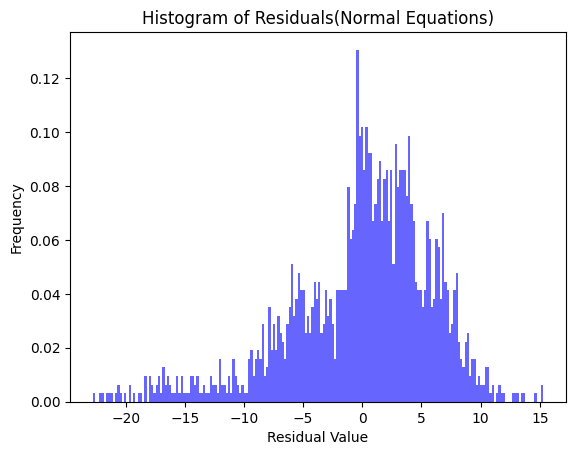

In [19]:
residualsNE5 = Y5 - A5 @ x_ne5

plt.hist(residualsNE5, bins=200, density=True, alpha=0.6, color='b')

plt.title('Histogram of Residuals(Normal Equations)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.show()

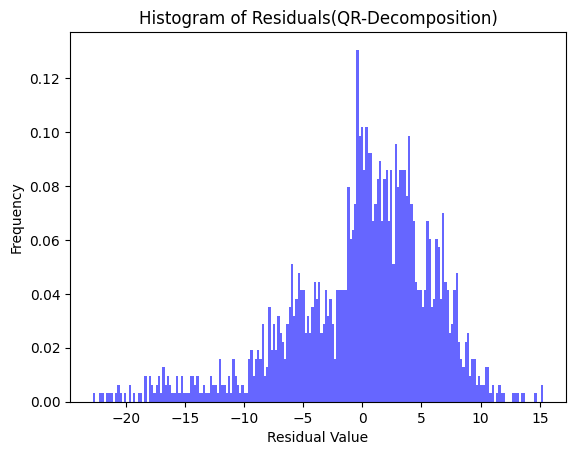

In [20]:
residualsQR5 = Y5 - A5 @ x_qr5

plt.hist(residualsQR5, bins=200, density=True, alpha=0.6, color='b')

plt.title('Histogram of Residuals(QR-Decomposition)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.show()

### 6(optimal)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path  =  'LifeExpectancyData.csv'
data = pd.read_csv(csv_file_path)
data_clean = data.dropna()
data_clean[:5]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
data6 = data_clean[['Life expectancy ','Schooling','Income composition of resources']]
data61 = data6[['Schooling','Income composition of resources']]
data62 = data6['Life expectancy ']
x6 = data6[['Schooling','Income composition of resources']].to_numpy()
x61 = data6['Schooling'].to_numpy()
x62 = data6['Income composition of resources'].to_numpy()
#x6
y6 = data6['Life expectancy '].to_numpy()
#y6
#x61

In [23]:
A6 = np.vstack([np.ones_like(x61), x61,x62]).T
Y6 = y6
#A6
#Y6

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import qr

#Method 1 Normal Equations 
ATA6 = A6.T @ A6
ATY6 = A6.T @ Y6
Coeffs_Normal_Equation6 = np.linalg.solve(ATA6, ATY6)
print(Coeffs_Normal_Equation6)

#Method 2 QR-Decomposition
Q6, R6 = qr(A6)
QTY6 = Q6.T @ Y6
Coeffs_QR6 = np.linalg.solve(R6, QTY6)
print(Coeffs_QR6)

[41.38866299  1.32506671 18.76962107]
[41.38866299  1.32506671 18.76962107]


Linear Regression: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$

$y = 41.38866299 + 1.32506671 x_1 + 18.76962107 x_2$
- x_1: Schooling 
- x_2: Income composition of resources